<a href="https://colab.research.google.com/github/keepGuessingGrl/2024_Geoinformatique_I/blob/main/%C3%A9tape_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd

In [ ]:
import pyogrio

In [ ]:
pyogrio.list_layers('geoinf-proj-ze-5293.gpkg')

array([['ze_5293', 'MultiPolygon'],
       ['perimetre-ze-joint', 'Polygon'],
       ['perimetre_evaluation', 'Polygon'],
       ['perimetre_ze_joint', 'MultiPolygon']], dtype=object)

In [ ]:
MultiPolygon = gpd.read_file('geoinf-proj-ze-5293.gpkg',  layer='ze_5293')
print(MultiPolygon.head())

      id ABREVIATIO    CM  CODE_CH CODE_COM CODE_VD_N2  COS   DATE_EV  \
0  23336       None     4       12   120101       1201  0.4  19841024   
1  33476       None  None       12   120101       1201  0.3  20010410   
2  74041       None  None       12   120101       1201  0.3  20010410   

  DATE_FIN                      DESIGN_CH  ... REMARQ_TYP SHAPE_AREA  \
0     None  Zones d'activités économiques  ...       None   9991.327   
1     None  Zones d'activités économiques  ...       None  16904.498   
2     None  Zones d'activités économiques  ...       None  54272.556   

  SHAPE_LEN SOUS_THEME   SPB  STATUT_JUR   SURFACE SYMBOLE  zid  \
0   429.844       None  None  En vigueur   9991.33    None  121   
1   589.762       None  None  En vigueur  16904.50    None  121   
2   902.298       None  None  En vigueur  54272.56    None  121   

                                            geometry  
0  MULTIPOLYGON (((2529945.579 1152721.729, 25299...  
1  MULTIPOLYGON (((2529626.892 1152699.

/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'geoinf-proj-ze-5293.gpkg': 'ze_5293' (default), 'perimetre-ze-joint', 'perimetre_evaluation', 'perimetre_ze_joint'. Specify layer parameter to avoid this warning.
  result = read_func(


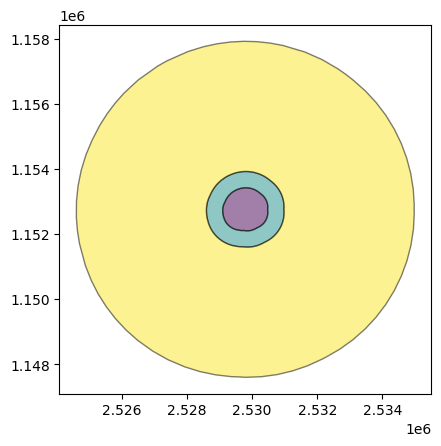

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import MultiPolygon
from shapely.ops import unary_union

# Load your MultiPolygon from a file or other source
# Example: Replace this with your actual file or data source
gdf = gpd.read_file("geoinf-proj-ze-5293.gpkg")  # Replace with your file path

# Combine all geometries into a single MultiPolygon
multi_poly = unary_union(gdf.geometry)

# Create buffers around the MultiPolygon
buffer_500m = multi_poly.buffer(500)
buffer_1km = multi_poly.buffer(1000)
buffer_5km = multi_poly.buffer(5000)

# Create the zones
zone_500m = buffer_500m  # 500-meter buffer
zone_500m_to_1km = buffer_1km.difference(buffer_500m)  # Ring between 500m and 1km
zone_1km_to_5km = buffer_5km.difference(buffer_1km)  # Ring between 1km and 5km

# Create a GeoDataFrame for visualization
zones_gdf = gpd.GeoDataFrame(
    {'geometry': [zone_500m, zone_500m_to_1km, zone_1km_to_5km]},
    crs=gdf.crs
)

# Plot the zones
zones_gdf.plot(edgecolor="black", alpha=0.5, cmap="viridis")
plt.show()


In [ ]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.7 MB/s eta 0:00:00


In [ ]:
import fiona

fiona.listlayers("swissBOUNDARIES3D_1_5_LV95_LN02.gpkg")

['tlm_hoheitsgrenze',
 'tlm_hoheitsgebiet',
 'tlm_bezirksgebiet',
 'tlm_landesgebiet',
 'tlm_kantonsgebiet']

In [ ]:
communes_gdf = gpd.read_file("swissBOUNDARIES3D_1_5_LV95_LN02.gpkg", layer='tlm_hoheitsgrenze')

Intersection for 500m:
                                     uuid datum_aenderung datum_erstellung  \
0  {27B5B7E7-8D24-406D-A82B-E5B8B6A566BA}      2023-10-24       2008-11-24   
1  {F972E94B-3BA8-45BF-B6AB-965E056E3FB4}      2023-10-24       2008-11-24   
2  {C1AB820A-096C-4D11-8D11-2A539B7AC8D1}      2023-10-24       2008-11-24   

   erstellung_jahr  erstellung_monat grund_aenderung   herkunft  \
0             2006                 1      Verbessert  swisstopo   
1             2006                 1      Verbessert  swisstopo   
2             2006                 1      Verbessert  swisstopo   

   herkunft_jahr  herkunft_monat  revision_jahr  ...  bezirksnummer  \
0           2024               1           2024  ...         2227.0   
1           2024               1           2024  ...         2227.0   
2           2024               1           2024  ...         2227.0   

  kantonsnummer         name  gem_flaeche  see_flaeche  icc         shn  \
0          22.0        Lonay       

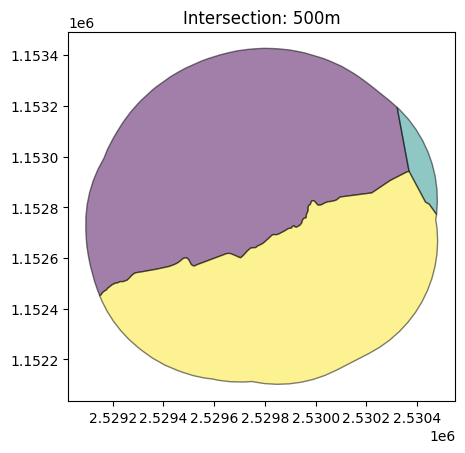

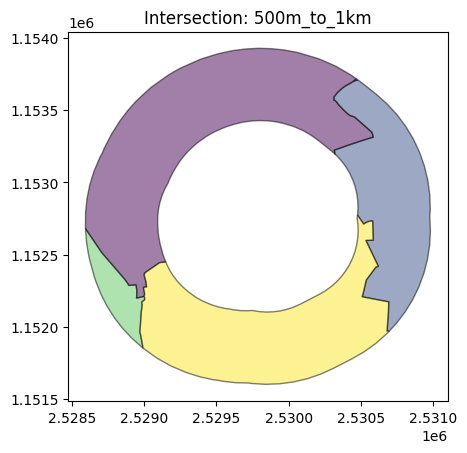

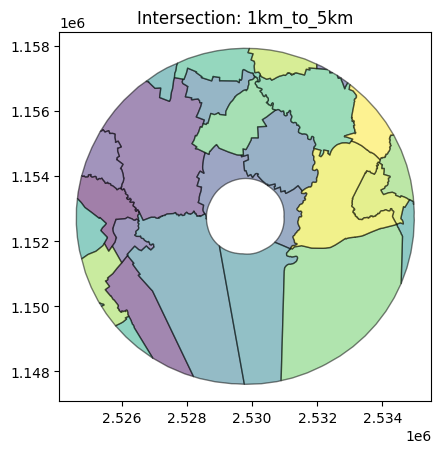

In [78]:
import geopandas as gpd
from shapely.geometry import MultiPolygon

# Load the communes layer (replace with actual layer name and file path)
communes_gdf = gpd.read_file("swissBOUNDARIES3D_1_5_LV95_LN02.gpkg", layer="tlm_hoheitsgebiet")
communes_gdf = communes_gdf.to_crs("EPSG:2056")

# Normalize geometry types
communes_gdf['geometry'] = communes_gdf.geometry.apply(
    lambda geom: geom if geom.geom_type == 'MultiPolygon' else MultiPolygon([geom])
)

# Create a dictionary of buffers and rings
zi_buf = {
    '500m': zone_500m,
    '500m_to_1km': zone_500m_to_1km,
    '1km_to_5km': zone_1km_to_5km
}

# Convert buffers and rings into GeoDataFrames
zi_buf_gdf = {
    k: gpd.GeoDataFrame(geometry=[poly], crs="EPSG:2056")
    for k, poly in zi_buf.items()
}

# Ensure geometries are MultiPolygons
for k in zi_buf_gdf:
    zi_buf_gdf[k]['geometry'] = zi_buf_gdf[k].geometry.apply(
        lambda geom: geom if geom.geom_type == 'MultiPolygon' else MultiPolygon([geom])
    )

# Perform intersection with communes for each buffer or ring
zi_buf_cmnes = {
    k: gpd.overlay(buf_gdf, communes_gdf, how="intersection", keep_geom_type=False)
    for k, buf_gdf in zi_buf_gdf.items()
}

# Inspect the results
for k, gdf in zi_buf_cmnes.items():
    print(f"Intersection for {k}:")
    print(gdf)

# Plot results to verify
for k, gdf in zi_buf_cmnes.items():
    gdf.plot(edgecolor="black", alpha=0.5, cmap="viridis")
    plt.title(f"Intersection: {k}")
    plt.show()


In [ ]:
import fiona

fiona.listlayers("ofs_geostat.gpkg")

['pop_2023', 'empl_2022']

In [93]:
import pandas as pd
import geopandas as gpd

# Charger les couches de points pour population et emplois
pop_gdf = gpd.read_file("/content/ofs_geostat.gpkg", layer="pop_2023")
empl_gdf = gpd.read_file("/content/ofs_geostat.gpkg", layer="empl_2022")

# Fonction pour jointure spatiale et somme des valeurs
def sjoin_summarize(poly_lyr, pts_lyr, pts_colname, poly_newcolname):
    """
    Associe chaque point à un polygone via une jointure spatiale,
    puis calcule la somme par polygone.
    """
    # Faire une jointure spatiale
    sjoin = pts_lyr.sjoin(poly_lyr, how="inner", predicate="within")

    # Calculer la somme par polygone
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()

    # Ajouter les résultats au GeoDataFrame des polygones
    poly_lyr[poly_newcolname] = poly_lyr.index.map(somme_par_poly)

for key, gdf in zi_buf_cmnes.items():
    #jointure spatial pour les employes:
    sjoin_summarize(gdf, empl_gdf, 'B08EMPT', 'empl_2022_sum')

def sjoin_summarize(poly_lyr, pts_lyr, pts_colname, poly_newcolname):
    sjoin = pts_lyr.sjoin(poly_lyr, how='inner', predicate='within')
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()
    poly_lyr[poly_newcolname] = poly_lyr.index.map(somme_par_poly)

for key, gdf in zi_buf_cmnes.items():
    sjoin_summarize(gdf, pop_gdf, 'BBTOT', 'pop_2023_sum')
    sjoin_summarize(gdf, empl_gdf, 'B08EMPT', 'empl_2022_sum')
    gdf['peri'] = key # Ajoutez une colonne pour identifier le périmètre

combined = pd.concat([zi_buf_cmnes[key][['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]
for key in zi_buf_cmnes], ignore_index=True)
combined.fillna(0, inplace=True) # Remplacez les NaN par 0

combined.dtypes

combined['pop_2023_sum'] = pd.to_numeric(combined['pop_2023_sum'], errors='coerce')
combined['empl_2022_sum'] = pd.to_numeric(combined['empl_2022_sum'], errors='coerce')

# Calculer le nombre de personnes pour chaque formule
combined['Njsem'] = 0.3* combined['pop_2023_sum']+0.8* combined['empl_2022_sum']
combined['Nnsem'] = 0.9 * combined['pop_2023_sum'] + 0.05 * combined['empl_2022_sum']
combined['Njwe'] = 0.6 * combined['pop_2023_sum'] + 0.05 * combined['empl_2022_sum']
combined['Nnwe'] = combined['pop_2023_sum'] # Nuit weekend (seulement la population)

import os

# Vérifier si le dossier 'resultats' existe, sinon le créer
output_dir = 'resultats'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Enregistrer le DataFrame en CSV dans le dossier 'resultats'
file_path = os.path.join(output_dir, 'personnes_par_peri_et_cmne.csv')
combined.to_csv(file_path, index=False)

# Vérifier que le fichier a été enregistré
print(f"Le fichier a été sauvegardé sous {file_path}")

combined.to_csv('resultats/personnes_par_peri_et_cmne.csv', index=False)


peri_summary = combined.groupby('peri', as_index=False).sum()
peri_summary.to_csv('resultats/personnes_par_peri.csv', index=False)

commune_summary = combined.groupby(['bfs_nummer', 'name'], as_index=False).sum()
commune_summary.to_csv('resultats/personnes_par_cmne.csv', index=False)


# Extraire les colonnes nécessaires pour chaque périmètre
data_peri = combined[['peri', 'Njsem', 'Nnsem', 'Njwe', 'Nnwe']]

# Regrouper par périmètre et calculer la somme
data_peri_grouped = data_peri.groupby('peri', as_index=False).sum()

# Enregistrer le fichier CSV
data_peri_grouped.to_csv(os.path.join(output_dir, 'personnes_par_peri.csv'), index=False)

# Vérifier le résultat
data_peri_grouped.head()

# Extraire les colonnes nécessaires pour chaque commune
data_cmne = combined[['bfs_nummer', 'name', 'Njsem', 'Nnsem', 'Njwe', 'Nnwe']]

# Regrouper par commune et calculer la somme
data_cmne_grouped = data_cmne.groupby(['bfs_nummer', 'name'], as_index=False).sum()

# Enregistrer le fichier CSV
data_cmne_grouped.to_csv(os.path.join(output_dir, 'personnes_par_cmne.csv'), index=False)

# Vérifier le résultat
data_cmne_grouped.head()

# Ajout de la colonne 'peri' à chaque GeoDataFrame
zi_buf_gdf['500m']['peri'] = 'zone_500m'
zi_buf_gdf['500m_to_1km']['peri'] = 'zone_500m_to_1km'
zi_buf_gdf['1km_to_5km']['peri'] = 'zone_1km_to_5km'

combined['pop_2023_sum'] = pd.to_numeric(combined['pop_2023_sum'], errors='coerce')
combined['empl_2022_sum'] = pd.to_numeric(combined['empl_2022_sum'], errors='coerce')
combined['Njsem'] = 0.3 * combined['pop_2023_sum'] + 0.8 * combined['empl_2022_sum']
combined['Nnsem'] = 0.9 * combined['pop_2023_sum'] + 0.05 * combined['empl_2022_sum']
combined['Njwe'] = 0.6 * combined['pop_2023_sum'] + 0.05 * combined['empl_2022_sum']
combined['Nnwe'] = combined['pop_2023_sum'] # La population est égale pour la nuit de weekend
combined['pop_2023_sum'].fillna(0, inplace=True)
combined['empl_2022_sum'].fillna(0, inplace=True)

print(combined.head()) # Affiche les premières 5 lignes du DataFrame"

import os

# Définir le chemin du dossier de résultats
output_dir = '/Users/macintoshhd/Desktop/resultats'
# Créer le dossier s'il n'existe pas
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Enregistrer le DataFrame sous forme de fichier CSV
combined.to_csv(os.path.join(output_dir, 'personnes_par_peri.csv'), index=False)







Le fichier a été sauvegardé sous resultats/personnes_par_peri_et_cmne.csv
   bfs_nummer         name         peri   pop_2023_sum  empl_2022_sum  \
0        5638        Lonay         500m   6.620842e+71   4.441045e+50   
1        5632       Denges         500m   0.000000e+00   0.000000e+00   
2        5643  Préverenges         500m   6.383321e+69   1.016139e+51   
3        5638        Lonay  500m_to_1km  1.097617e+110   1.131036e+53   
4        5632       Denges  500m_to_1km   3.319383e+27   7.281046e+17   

           Njsem          Nnsem           Njwe           Nnwe  
0   1.986253e+71   5.958758e+71   3.972505e+71   6.620842e+71  
1   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00  
2   1.914996e+69   5.744989e+69   3.829992e+69   6.383321e+69  
3  3.292851e+109  9.878553e+109  6.585702e+109  1.097617e+110  
4   9.958149e+26   2.987445e+27   1.991630e+27   3.319383e+27  


<ipython-input-93-76db6753d7e1>:111: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['pop_2023_sum'].fillna(0, inplace=True)
<ipython-input-93-76db6753d7e1>:112: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [94]:

# Vérifier si le fichier a été créé
print(os.listdir(output_dir))


['personnes_par_peri.csv']
